<a href="https://colab.research.google.com/github/UNRENZ/COSC110/blob/main/lab2_titanic_onrada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [9]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
df = pd.read_csv('/content/drive/My Drive/DATASET/titanic.csv')

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [49]:
df.duplicated().sum()

0

In [50]:
df["Survived"] = df["Survived"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")

In [51]:
df.columns = df.columns.str.lower()

In [52]:
df.to_csv("titanic_cleaned.csv", index=False)

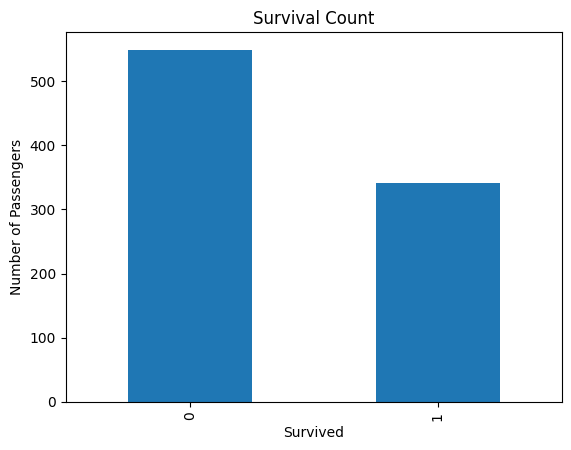

In [53]:
df["survived"].value_counts().plot(kind="bar")
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.show()

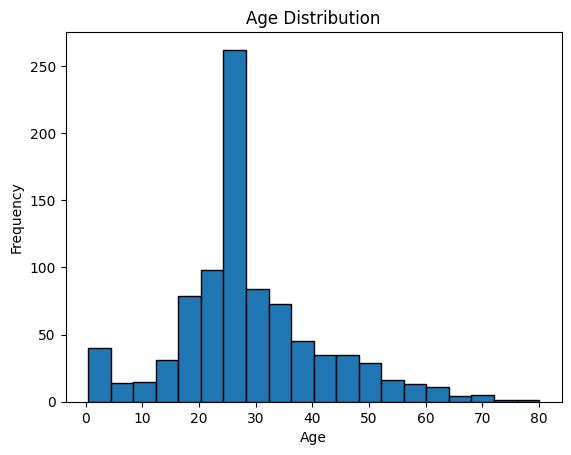

In [54]:
df["age"].plot(kind="hist", bins=20, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

In [60]:
df["survived"] = pd.to_numeric(df["survived"], errors='coerce')

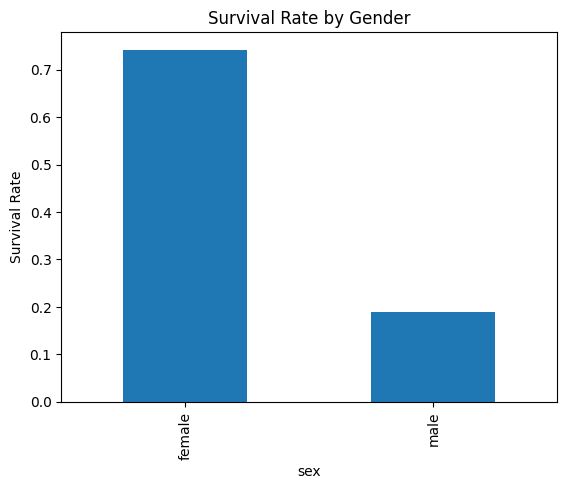

In [61]:
df.groupby("sex")["survived"].mean().plot(kind="bar")
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

In [84]:
df["family_size"] = df["sibsp"] + df["parch"]

In [85]:
df.head(
)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,name_length,name_bin,family_size,with_family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,23,"(19.0, 23.0]",1,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,51,"(32.0, 82.0]",1,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,22,"(19.0, 23.0]",0,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,44,"(32.0, 82.0]",1,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,24,"(23.0, 27.0]",0,False


In [75]:
df["with_family"] = df["family_size"] > 0

In [76]:
survival_rates = df.groupby("with_family")["survived"].mean()

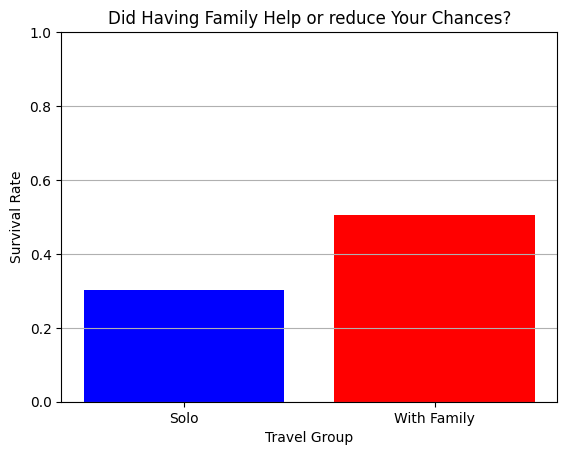

In [83]:
plt.bar(["Solo", "With Family"], survival_rates, color=["blue", "red"])
plt.xlabel("Travel Group")
plt.ylabel("Survival Rate")
plt.title("Did Having Family Help or reduce Your Chances?")
plt.ylim(0, 1)  # Survival rate is between 0 and 1
plt.grid(axis="y")
plt.show()

Question 1
1.  identifying Missing Values - I checked which columns had missing data.
2.  Removed Columns with Too Many Missing Values. If a column had a lot of missing values, I dropped it to keep the data useful.
3.  For columns with only a few missing values, I used the median because it is not affected by extreme values.
4.  I made sure each column had the correct data type to avoid errors.
5.  I changed all column names to lowercase.
I used median to fill missing values because it is more stable than the average when there are extreme numbers. I removed columns with too much missing data to keep the dataset reliable. Fixing data types and standardizing names makes the dataset easier to work with and reduces mistakes in analysis.

Question 2
1. Passengers who traveled with family had a higher survival rate (50%) compared to those who were alone (30%). This suggests that having family onboard increased the chances of survival, possibly because family members helped each other or were prioritized for lifeboats. Meanwhile, solo travelers may have struggled to secure a spot.
2. Professionals like doctors, captains, and reverends had a slightly higher survival rate than regular passengers like Mr. and Mrs., but the difference was small. This could be due to social status, leadership roles, or pure luck.






In [90]:
df["title"] = df["name"].str.extract(r' (\w+)\.', expand=False)

# Define professional titles (e.g., Dr., Capt., Rev., Col., Major)
professional_titles = ["Dr", "Capt", "Rev", "Col", "Major", "Sir", "Don", "Jonkheer"]

In [92]:

df["is_professional"] = df["title"].isin(professional_titles)
df["is_regular"] = df["title"].isin(["Mr", "Mrs"])

survival_rates = {
    "Professionals (Dr, Capt, etc.)": df[df["is_professional"]]["survived"].mean(),
    "Regular People (Mr, Mrs)": df[df["is_regular"]]["survived"].mean()
}


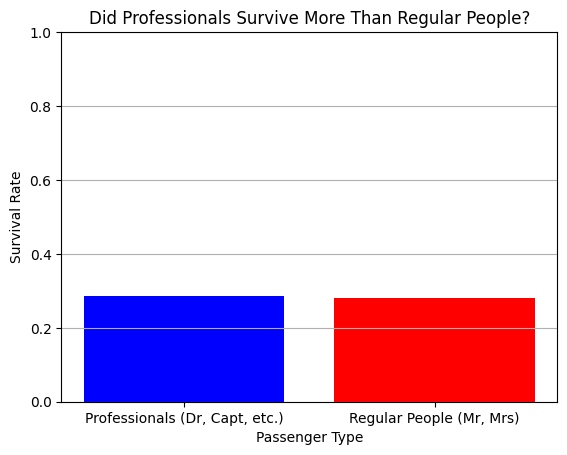

In [93]:
plt.bar(survival_rates.keys(), survival_rates.values(), color=["blue", "red"])
plt.xlabel("Passenger Type")
plt.ylabel("Survival Rate")
plt.title("Did Professionals Survive More Than Regular People?")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.show()